## Imports 🙅🏻‍♂️🙅🏻‍♀️

In [4]:
import matplotlib
# !pip install opencv-python
import matplotlib.pyplot as ajeeb
import cv2
import math
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import linalg
from scipy.linalg import null_space
# !pip install imageio
import imageio
import os

In [5]:
#  I will resize all the images to 800x800 so that I can compute the homography
# matrix and have a uniform way of comparing my images with those taken from other
# devices. 

# I will grayscale them to make processing more efficient and to optimize runtime
def preprocess(path1, path2):

    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    
    img1_resized = cv2.resize(img1, (800, 800))
    img2_resized = cv2.resize(img2, (800, 800))
    
    img1_gray = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(os.path.join(os.path.dirname(path1), 'img1_gray.jpg'), img1_gray)
    cv2.imwrite(os.path.join(os.path.dirname(path2), 'img2_gray.jpg'), img2_gray)
    
    return img1_gray, img2_gray

path1 = '/Users/fj/Downloads/2.jpeg'
path2 = '/Users/fj/Downloads/3.jpeg'

img1_gray, img2_gray = preprocess(path1, path2)


In [34]:
# Save your points in an np.array
p1 = !python3 24100232_HamzaAkmal_PA3.py
print(p1)

['[[585 254]', ' [726 558]', ' [665 641]', ' [739 251]]']


In [35]:
# Save your points in an np.array
p2 = !python3 24100232_HamzaAkmal_PA3.py
print(p2)

['[[128 277]', ' [113 663]', ' [246 573]', ' [274 270]]']


In [42]:
def string_to_numeric_points(point_string):
    points = point_string.translate({ord(c): None for c in '[]'}).split()
    return [float(point) for point in points]

p1_numeric = [string_to_numeric_points(point) for point in p1]
p2_numeric = [string_to_numeric_points(point) for point in p2]


A = []
for i in range(len(p1_numeric)):
    x1, y1 = p1_numeric[i]
    x2, y2 = p2_numeric[i]
    A.append([-x1, -y1, -1, 0, 0, 0, x2*x1, x2*y1, x2])
    A.append([0, 0, 0, -x1, -y1, -1, y2*x1, y2*y1, y2])

A = np.array(A)


In [44]:
# List of useful functions
u, s, vh = np.linalg.svd(A) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]

P = np.array([P[0:3], P[3:6], P[6:9]])
print("Homography matrix\n",P)

Homography matrix
 [[ 5.72640994e-04 -8.62021094e-04  2.30513415e-02]
 [-5.14254768e-04 -1.56646728e-03  9.99727597e-01]
 [-1.68701963e-06 -4.02109898e-06  3.09492941e-03]]


In [61]:
image1 = cv2.imread('img1_gray.jpg')
image2 = cv2.imread('img2_gray.jpg')

result = cv2.warpPerspective(image1, P, (image2.shape[1] + image1.shape[1], image2.shape[0]))
result[0:image2.shape[0], 0:image2.shape[1]] = image2
cv2.imwrite('panorama.jpeg', result)


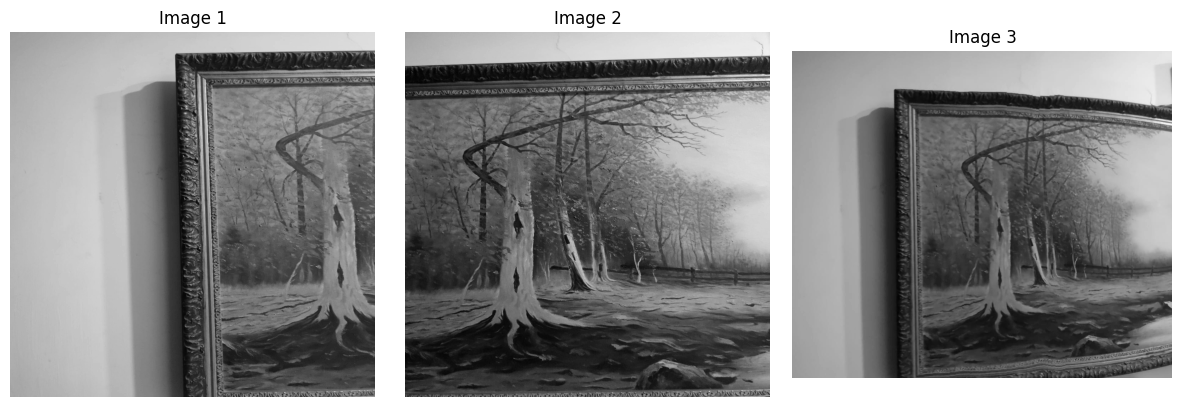

In [66]:
image1_gray = cv2.imread('img1_gray.jpg', cv2.IMREAD_GRAYSCALE)
image2_gray = cv2.imread('img2_gray.jpg', cv2.IMREAD_GRAYSCALE)
image3_gray = cv2.imread('panorama1.jpeg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image1_gray, cmap='gray')
plt.axis('off')
plt.title('Image 1')

plt.subplot(1, 3, 2)
plt.imshow(image2_gray, cmap='gray')
plt.axis('off')
plt.title('Image 2')

plt.subplot(1, 3, 3)
plt.imshow(image3_gray, cmap='gray')
plt.axis('off')
plt.title('Image 3')

plt.tight_layout()
plt.show()

### Defining the Axis (5 Marks)

Text(0.5, 1.0, 'Chess Board')

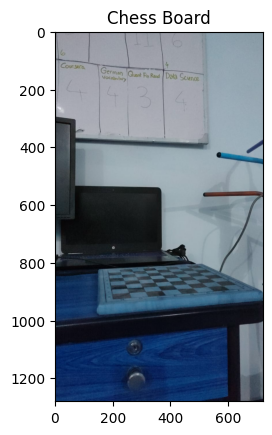

In [73]:
# Load the image you captured, display it and Define its axis. 
last = cv2.imread('Last.jpeg')
plt.imshow(last)
plt.title('Chess Board')


In [74]:
p20 = !python3 24100232_HamzaAkmal_PA3.py
print(p20)

['[[150 987]', ' [202 929]', ' [263 927]', ' [321 923]', ' [381 918]', ' [436 915]', ' [490 910]', ' [547 903]', ' [599 900]', ' [651 897]', ' [192 871]', ' [239 866]', ' [290 868]', ' [336 865]', ' [381 859]', ' [428 854]', ' [468 852]', ' [514 854]', ' [555 846]', ' [507 808]]']


In [75]:
print(len(p20))

20


I have chosen 20 points for my representation.

Point 1: World Origin - Bottom left of the chess board

    Distance from board corner to chess play area along x and z is 20mm each, along y is 17mm
    Each square is 30x30mm

Point 2:10 bottom corners of chess squares for row 1 starting from near the observer. (Left to Right till row end)

Point 3:19 bottom corners of chess squares for row 3 starting from near the observer, (Left to Right till row end)

Point 20: Top right corner of the chess board

In [79]:
triplets = [
    (0, 0, 0),
    (20, 17, 20), (50, 17, 20), (80, 17, 20), (110, 17, 20),
    (140, 17, 20), (170, 17, 20), (200, 17, 20), (230, 17, 20), (260, 17, 20),
    (20, 17, 110), (50, 17, 110), (80, 17, 110), (110, 17, 110),
    (140, 17, 110), (170, 17, 110), (200, 17, 110), (230, 17, 110), (260, 17, 110),
    (280, 17, 130)
]

points3D = np.array(triplets)
print(len(points3D))
print(points3D)

20
[[  0   0   0]
 [ 20  17  20]
 [ 50  17  20]
 [ 80  17  20]
 [110  17  20]
 [140  17  20]
 [170  17  20]
 [200  17  20]
 [230  17  20]
 [260  17  20]
 [ 20  17 110]
 [ 50  17 110]
 [ 80  17 110]
 [110  17 110]
 [140  17 110]
 [170  17 110]
 [200  17 110]
 [230  17 110]
 [260  17 110]
 [280  17 130]]


In [84]:
markedP = [s.strip(' []') for s in p20]

points2Da = [tuple(map(int, triplet.split())) for triplet in markedP]

points2D = np.array(points2Da)

print(len(points2D))

print(points2D)




20
[[150 987]
 [202 929]
 [263 927]
 [321 923]
 [381 918]
 [436 915]
 [490 910]
 [547 903]
 [599 900]
 [651 897]
 [192 871]
 [239 866]
 [290 868]
 [336 865]
 [381 859]
 [428 854]
 [468 852]
 [514 854]
 [555 846]
 [507 808]]


In [85]:
xy_values = np.array([
    [150, 987],
    [202, 929],
    [263, 927],
    [321, 923],
    [381, 918],
    [436, 915],
    [490, 910],
    [547, 903],
    [599, 900],
    [651, 897],
    [192, 871],
    [239, 866],
    [290, 868],
    [336, 865],
    [381, 859],
    [428, 854],
    [468, 852],
    [514, 854],
    [555, 846],
    [507, 808]
])

XYZ_values = np.array([
    [0, 0, 0],
    [20, 17, 20],
    [50, 17, 20],
    [80, 17, 20],
    [110, 17, 20],
    [140, 17, 20],
    [170, 17, 20],
    [200, 17, 20],
    [230, 17, 20],
    [260, 17, 20],
    [20, 17, 110],
    [50, 17, 110],
    [80, 17, 110],
    [110, 17, 110],
    [140, 17, 110],
    [170, 17, 110],
    [200, 17, 110],
    [230, 17, 110],
    [260, 17, 110],
    [280, 17, 130]
])


num_points = xy_values.shape[0]
C = np.zeros((2 * num_points, 12))

for i in range(num_points):
    x, y = xy_values[i]
    X, Y, Z = XYZ_values[i]
    
    C[2*i, 0:4] = [X, Y, Z, 1]
    C[2*i, 8:12] = [-x*X, -x*Y, -x*Z, -x]
    
    C[2*i+1, 4:8] = [X, Y, Z, 1]
    C[2*i+1, 8:12] = [-y*X, -y*Y, -y*Z, -y]

C


array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -1.5000e+02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -9.8700e+02],
       [ 2.0000e+01,  1.7000e+01,  2.0000e+01,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -4.0400e+03, -3.4340e+03,
        -4.0400e+03, -2.0200e+02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  2.0000e+01,
         1.7000e+01,  2.0000e+01,  1.0000e+00, -1.8580e+04, -1.5793e+04,
        -1.8580e+04, -9.2900e+02],
       [ 5.0000e+01,  1.7000e+01,  2.0000e+01,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -1.3150e+04, -4.4710e+03,
        -5.2600e+03, -2.6300e+02],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  5.0000e+01,
         1.7000e+01,  

In [94]:
u, s, vh = np.linalg.svd(C) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]
print(P.shape)

P_matrix = P.reshape((3, 4))
print("Homography matrix\n",P)

(12,)
Homography matrix
 [-4.24741322e-16  8.82300585e-03 -1.15659823e-15 -1.49991099e-01
 -1.99557347e-15  5.80553785e-02 -5.48534964e-16 -9.86941434e-01
  1.21517372e-18  5.88200390e-05  3.79758761e-19 -9.99940663e-04]


Scaling the homography matrix by normalizing with last element gives a vanishing point in y and we get the last column index representing camera center in the image

In [97]:
reformedPointsAfterScalingHomographyMatrix= np.array([[ 155.67652996, 1062.27794441],
       [ 210.06578578,  911.35576098],
       [ 302.75170413,  863.32557701],
       [ 308.5629975 ,  964.0637074 ],
       [ 353.25892709,  860.95697475],
       [ 467.44392088, 1032.42136892],
       [ 507.61593837,  792.50676156],
       [ 599.1950732 ,  829.90206929],
       [ 509.02619085,  976.24040855],
       [ 622.55026077,  940.68615868],
       [ 175.34915144,  947.55033553],
       [ 238.49216455,  868.38717344],
       [ 247.75821117,  763.89130349],
       [ 323.06909694,  975.69939705],
       [ 341.84600152,  982.39174094],
       [ 413.22540374,  834.39397287],
       [ 483.37712929,  952.23566558],
       [ 510.37254035,  851.74032675],
       [ 554.35874137,  944.01017967],
       [ 449.03443926,  742.62396969]])
average_difference = np.mean(np.abs(reformedPointsAfterScalingHomographyMatrix - points2D), axis=0)
print(average_difference)



[25.86109775 69.26336819]


# FINISH 🍿🍿🍿